<a href="https://colab.research.google.com/github/DevZyan/machine_learning_projects/blob/ml/team5_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM 5
##    Nayan pal 24AI10039
##    Puneet Kumar 24AI10044
##    Pareddi Sai Dinesh Reddy 24AI10041

# Users vs Bots Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bots_vs_users.csv')

In [3]:
df.shape

(5874, 60)

In [4]:
df.sample(10)

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
3331,1.0,1.0,1.0,0.0,1.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Petrozavodsk,1.0,1.0,0.0,Unknown
4096,1.0,Unknown,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,1.0,1.0,0.0,Unknown
3279,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,598.42,0.0,0.40,Saint Petersburg,1.0,1.0,0.0,Unknown
2200,1.0,Unknown,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1344,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1644,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2861,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
430,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4813,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,...,0.0,538.5,99.33,0.0,0.77,Saint Petersburg,Unknown,Unknown,Unknown,1.0
3968,1.0,1.0,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Kostomuksha,Unknown,Unknown,Unknown,Unknown


In [5]:
df.columns

Index(['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall',
       'can_send_message', 'has_website', 'gender', 'has_short_name',
       'has_first_name', 'has_last_name', 'access_to_closed_profile',
       'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name',
       'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music', 'can_add_as_friend',
       'can_invite_to_group', 'subscribers_count', 'is_blacklisted',
       'has_career', 'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbe

During Sampling, A lot of Unknown values are observed.

**Replacing "Unknown" with NaN**

In [6]:
df.replace(["Unknown","unknown", ""], np.nan, inplace=True)

In [7]:
binary_columns = [
    col for col in df.columns
    if df[col].dtype == 'object' and df[col].nunique() <= 3 and col != "city"
]

for col in binary_columns:
    df[col] = df[col].astype(float)

In [8]:
numeric_columns = [
    'subscribers_count', 'avg_views', 'avg_likes', 'avg_comments',
    'avg_text_length', 'avg_keywords', 'hashtags_ratio',
    'reposts_ratio', 'ads_ratio', 'posting_frequency_days',
    'phone_numbers_ratio', 'links_ratio', 'attachments_ratio',
    'avg_text_uniqueness', 'posts_count'
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary)

has_personal_data             5006
has_movies                    4601
has_books                     4601
has_activities                4601
has_tv                        4601
has_quotes                    4601
has_about                     4601
has_games                     4601
has_interests                 4601
has_hometown                  4601
has_career                    4601
has_music                     4601
has_military_service          4601
has_relatives                 4601
has_schools                   4601
has_universities              4601
marital_status                4601
reposts_ratio                 4483
posts_count                   4483
links_ratio                   4483
avg_likes                     4483
hashtags_ratio                4483
avg_text_length               4483
avg_keywords                  4483
avg_comments                  4483
avg_text_uniqueness           4483
posting_frequency_days        4483
avg_views                     4483
ads_ratio           

##**VISUAL EDA**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice visual style
sns.set(style="whitegrid")

**Distribution of Target Variable**

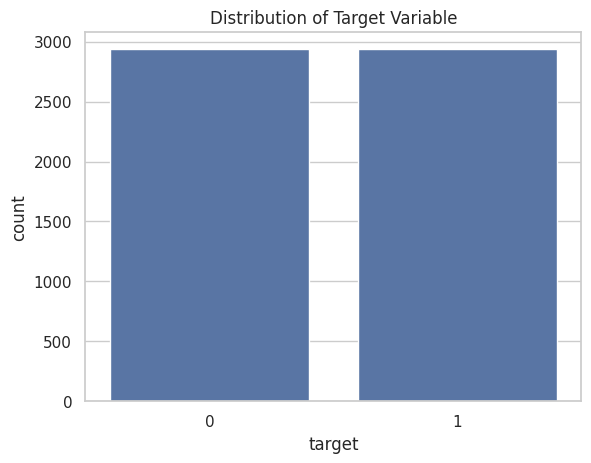

In [11]:
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')
plt.show()

In [12]:
# Map gender numbers to readable labels
df['gender_label'] = df['gender'].map({1: 'Male', 2: 'Female'})


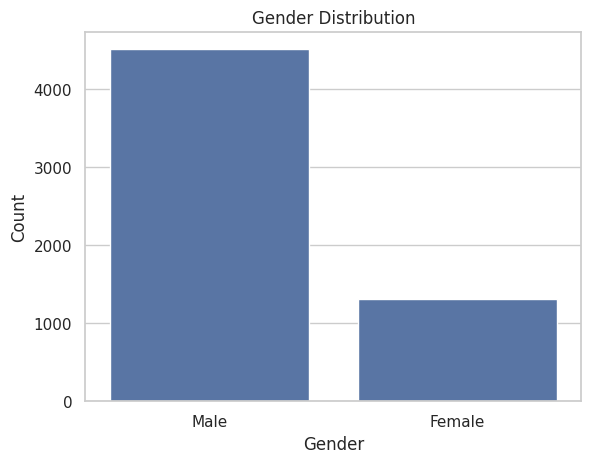

In [13]:
sns.countplot(data=df, x='gender_label', order=['Male', 'Female'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

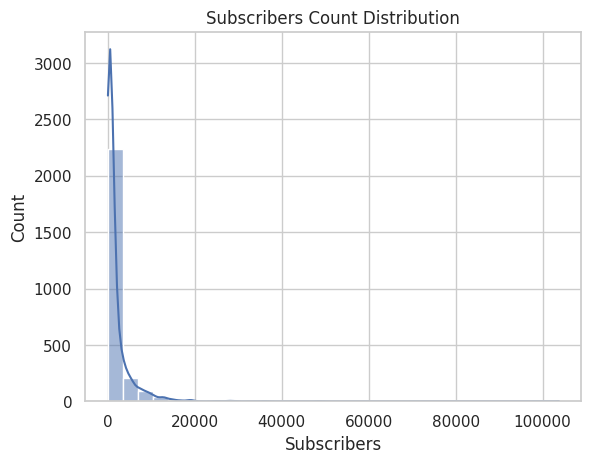

In [14]:
sns.histplot(df['subscribers_count'], kde=True, bins=30)
plt.title('Subscribers Count Distribution')
plt.xlabel('Subscribers')
plt.show()

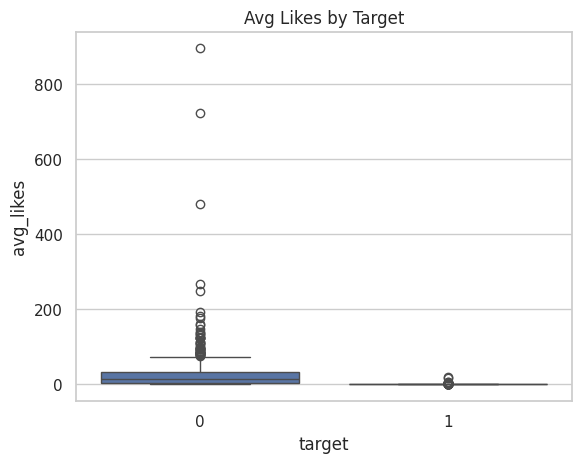

In [15]:
sns.boxplot(data=df, x='target', y='avg_likes')
plt.title('Avg Likes by Target')
plt.show()

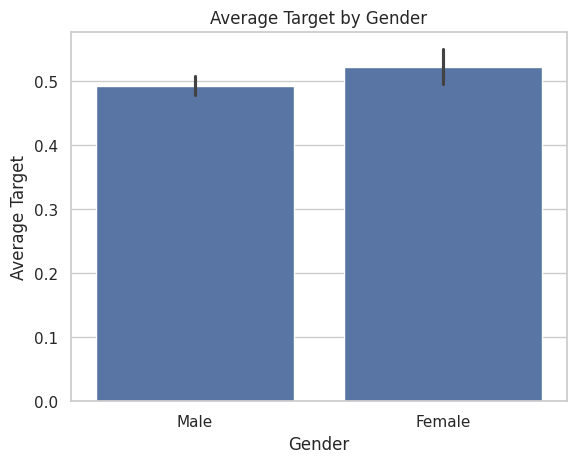

In [16]:
sns.barplot(data=df, x='gender_label', y='target', order=['Male', 'Female'])
plt.title('Average Target by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Target')
plt.show()

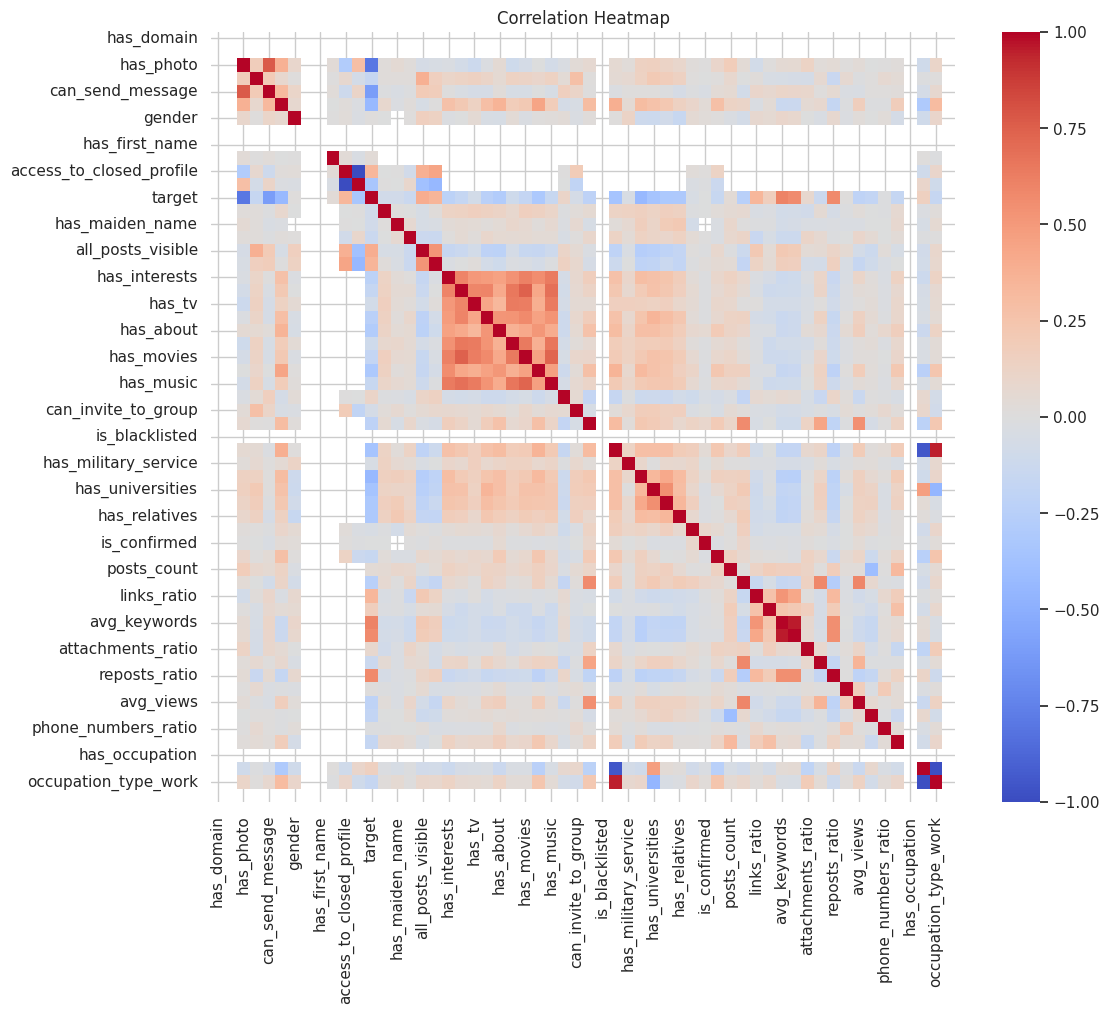

In [17]:
# Get only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Fill missing numeric values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [19]:
# Get object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill missing categorical values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-19-eb996d396634>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [20]:
# Confirm all missing values are handled
print(df.isnull().sum().sum())  # should output 0


0


In [21]:
# Define a threshold for top 5% in engagement
likes_thresh = df['avg_likes'].quantile(0.95)
comments_thresh = df['avg_comments'].quantile(0.95)
text_length_thresh = df['avg_text_length'].quantile(0.95)

# Filter users who are high on all engagement fronts
high_engagement = df[
    (df['avg_likes'] >= likes_thresh) &
    (df['avg_comments'] >= comments_thresh) &
    (df['avg_text_length'] >= text_length_thresh)
]

# Preview them
print(high_engagement[['avg_likes', 'avg_comments', 'avg_text_length', 'target']].head())


      avg_likes  avg_comments  avg_text_length  target
3159     193.40         64.05          1456.10       0
3177      69.40          3.35          1631.75       0
3787      50.45          5.20          1280.65       0
4212      50.50          3.05          1000.05       0
4273      88.80          2.15           759.40       0


In [22]:
inactive_or_suspicious = df[
    (df['posts_count'] == 0) |
    (df['avg_text_uniqueness'] < 0.1) |
    (df['has_photo'] == 0)
]

print(inactive_or_suspicious[['posts_count', 'avg_text_uniqueness', 'has_photo', 'target']].head())


   posts_count  avg_text_uniqueness  has_photo  target
0         20.0                 0.71        0.0       1
1         20.0                 0.71        0.0       1
2         20.0                 0.71        0.0       1
3         20.0                 0.71        0.0       1
4         20.0                 0.71        0.0       1


In [23]:
print(df.columns.tolist())


['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall', 'can_send_message', 'has_website', 'gender', 'has_short_name', 'has_first_name', 'has_last_name', 'access_to_closed_profile', 'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name', 'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests', 'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games', 'has_movies', 'has_activities', 'has_music', 'can_add_as_friend', 'can_invite_to_group', 'subscribers_count', 'is_blacklisted', 'has_career', 'has_military_service', 'has_hometown', 'marital_status', 'has_universities', 'has_schools', 'has_relatives', 'is_verified', 'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio', 'hashtags_ratio', 'avg_keywords', 'avg_text_length', 'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio', 'avg_views', 'posting_frequency_days', 'phone_numbers_ratio', 'avg_text_uniqueness', 'city', 'has_occupation', 'occupation_type_university', 'occupa

In [24]:
# Average target by occupation
df.groupby('occupation_type_work')['target'].mean().sort_values(ascending=False).head(10)


,target
occupation_type_work,
0.0,0.583886
1.0,0.034560


In [25]:
# Average target by occupation
df.groupby('occupation_type_university')['target'].mean().sort_values(ascending=False).head(10)

,target
occupation_type_university,
1.0,0.584374
0.0,0.038546


In [27]:
df.groupby('city')['target'].mean().sort_values(ascending=False).head(10)


,target
city,
Zvenigovo,1.0
Abakan,1.0
Aktobe,1.0
Alatyr,1.0
Albaba (poselok Zheleznodorozhnogo Razezda),1.0
Ulyanovsk,1.0
Usadische (boxitogorskoe G/p),1.0
Ussuriysk,1.0
Velikie Luki,1.0


In [28]:
# Create new engagement-based features
df['engagement_score'] = df['avg_likes'] + df['avg_comments'] + df['avg_text_length']
df['likes_per_post'] = df['avg_likes'] / (df['posts_count'] + 1)
df['comments_per_post'] = df['avg_comments'] / (df['posts_count'] + 1)
df['text_length_per_post'] = df['avg_text_length'] / (df['posts_count'] + 1)
df['is_active'] = (df['posts_count'] > 0).astype(int)

In [29]:
# Select features for modeling
features = [
    'subscribers_count', 'avg_views', 'avg_likes', 'avg_comments',
    'avg_text_length', 'avg_keywords', 'hashtags_ratio', 'reposts_ratio',
    'ads_ratio', 'posting_frequency_days', 'phone_numbers_ratio',
    'links_ratio', 'attachments_ratio', 'avg_text_uniqueness', 'posts_count',
    'engagement_score', 'likes_per_post', 'comments_per_post',
    'text_length_per_post', 'is_active'
]

# Filter to only those features that exist in the dataframe
features = [col for col in features if col in df.columns]
X = df[features]
y = df['target']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=4
)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.66      0.78       588
           1       0.74      0.98      0.84       587

    accuracy                           0.82      1175
   macro avg       0.85      0.82      0.81      1175
weighted avg       0.85      0.82      0.81      1175

Confusion Matrix:
 [[386 202]
 [ 14 573]]
ROC AUC Score: 0.8389597747105657


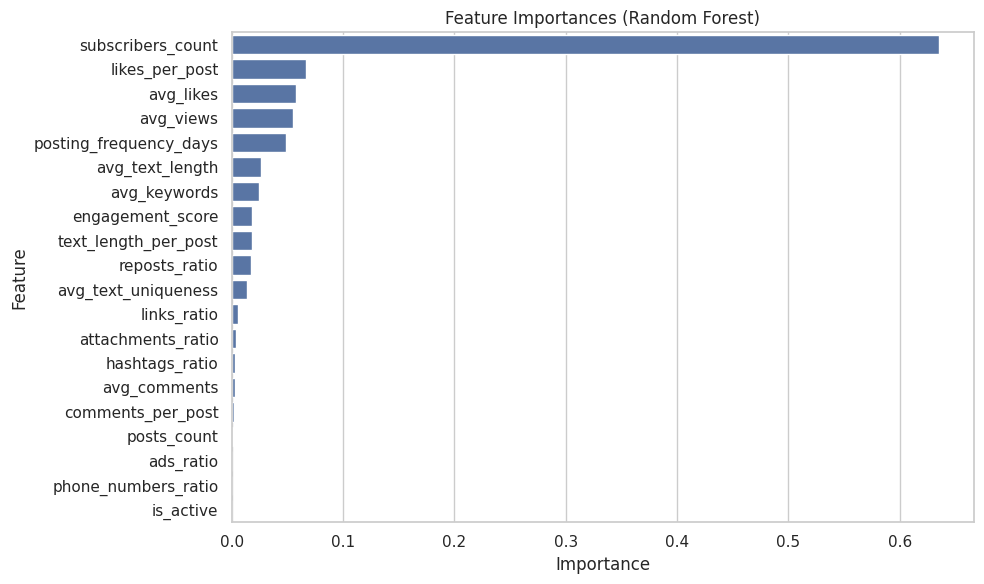

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


WITHOUT DATA CLEANING

target
1    2937
0    2937
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.81       588
           1       0.76      0.97      0.85       587

    accuracy                           0.83      1175
   macro avg       0.86      0.83      0.83      1175
weighted avg       0.86      0.83      0.83      1175

Confusion Matrix:
 [[408 180]
 [ 16 571]]
ROC AUC Score: 0.8609367937975871


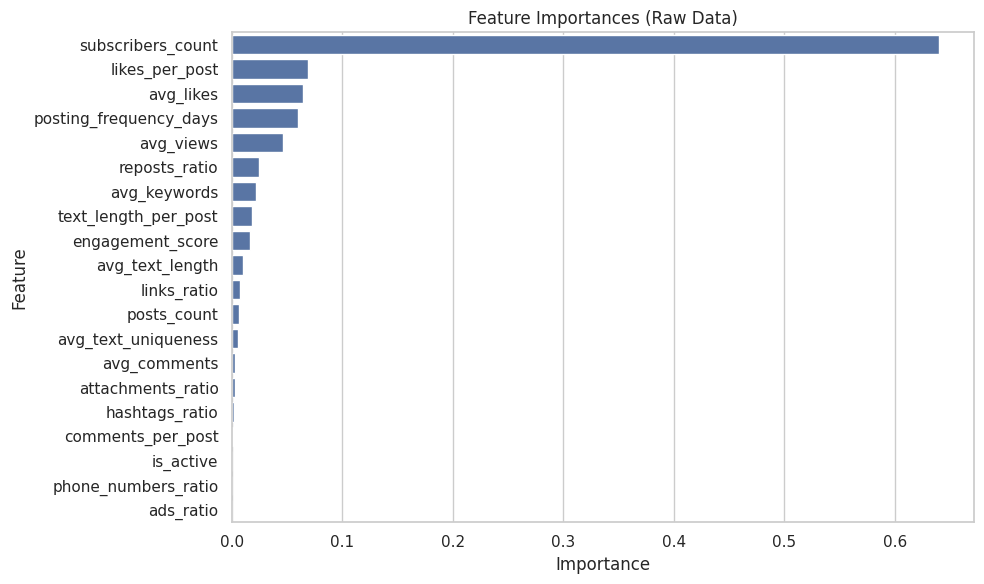

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw dataset
df = pd.read_csv('bots_vs_users.csv')

# Quick look at target
print(df['target'].value_counts())
df.replace(["Unknown","unknown", ""], np.nan, inplace=True)

# Basic feature engineering (skip error handling)
df['engagement_score'] = df['avg_likes'] + df['avg_comments'] + df['avg_text_length']
df['likes_per_post'] = df['avg_likes'] / (df['posts_count'] + 1)
df['comments_per_post'] = df['avg_comments'] / (df['posts_count'] + 1)
df['text_length_per_post'] = df['avg_text_length'] / (df['posts_count'] + 1)
df['is_active'] = (df['posts_count'] > 0).astype(int)

# Select features (without checking for nulls or types)
features = [
    'subscribers_count', 'avg_views', 'avg_likes', 'avg_comments',
    'avg_text_length', 'avg_keywords', 'hashtags_ratio', 'reposts_ratio',
    'ads_ratio', 'posting_frequency_days', 'phone_numbers_ratio',
    'links_ratio', 'attachments_ratio', 'avg_text_uniqueness', 'posts_count',
    'engagement_score', 'likes_per_post', 'comments_per_post',
    'text_length_per_post', 'is_active'
]

X = df[features]
y = df['target']

# Split data (RandomForest handles NaNs by skipping them, but will drop affected rows)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Feature importance
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Raw Data)')
plt.tight_layout()
plt.show()
